In [1]:
#Imports necessary library using NILMTK enviroment
from pylab import rcParams
import matplotlib.pyplot as plt
from os.path import join
import nilmtk as ntk
import nilmtk.disaggregate as ntkd
import nilmtk.metrics as ntkm
from matplotlib.sankey import Sankey
%matplotlib inline

rcParams['figure.figsize'] = (14, 6)
plt.style.use('ggplot')

In [3]:
#Uploading the dataset and define the location of data
h5_path = '/Users/Dhruvin suthar/Desktop/Thesis work/test_of_database/DRED/DRED' 
dred = ntk.DataSet(join(h5_path,'DRED.h5'))
print('loaded ' + str(len(dred.buildings)) + ' buildings')


loaded 1 buildings


In [4]:
#Load the data from H5 file for a 1 week (appearant dataset: 05.07.2015 to 10.07.2015)
dred.set_window(start=None, end='2015-07-10 00:00:00')
elec = dred.buildings[1].elec
elec

MeterGroup(meters=
  ElecMeter(instance=1, building=1, dataset='DRED', site_meter, appliances=[])
  ElecMeter(instance=2, building=1, dataset='DRED', appliances=[Appliance(type='television', instance=1)])
  ElecMeter(instance=3, building=1, dataset='DRED', appliances=[Appliance(type='fan', instance=1)])
  ElecMeter(instance=4, building=1, dataset='DRED', appliances=[Appliance(type='fridge', instance=1)])
  ElecMeter(instance=5, building=1, dataset='DRED', appliances=[Appliance(type='laptop computer', instance=1)])
  ElecMeter(instance=6, building=1, dataset='DRED', appliances=[Appliance(type='electric heating element', instance=1)])
  ElecMeter(instance=7, building=1, dataset='DRED', appliances=[Appliance(type='oven', instance=1)])
  ElecMeter(instance=8, building=1, dataset='DRED', appliances=[Appliance(type='unknown', instance=1)])
  ElecMeter(instance=9, building=1, dataset='DRED', appliances=[Appliance(type='washing machine', instance=1)])
  ElecMeter(instance=10, building=1, datas

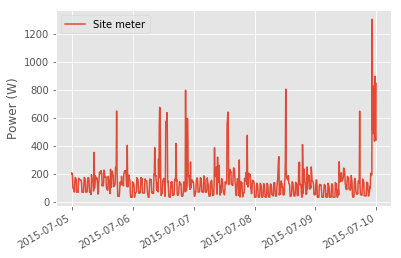

In [5]:
#plotting the aggregated power of appliances 
mains = elec.mains()
mains.plot()

In [6]:
#opning the aggregated power dataset
mains_df = next(mains.load())
mains_df.head()

,power
,apparent
2015-07-05 00:00:08+02:00,223.0
2015-07-05 00:00:09+02:00,223.6
2015-07-05 00:00:10+02:00,224.2
2015-07-05 00:00:11+02:00,224.8
2015-07-05 00:00:12+02:00,225.4


In [7]:
# Findind the type of power
mains.available_ac_types('power')

['apparent']

In [8]:
#available recodered power
elec.submeters().available_ac_types('power')

['apparent']

In [9]:
# type of power
elec.mains().total_energy() 

apparent    16.584037
dtype: float64

In [10]:
#opening the dataset appliancesvise
energy_per_meter = elec.submeters().energy_per_meter() # kWh, again
energy_per_meter

12/12 ElecMeter(instance=13, building=1, dataset='DRED', appliances=[Appliance(type='cooker', instance=1)])))=1)])ance=1)])

,"(2, 1, DRED)","(3, 1, DRED)","(4, 1, DRED)","(5, 1, DRED)","(6, 1, DRED)","(7, 1, DRED)","(8, 1, DRED)","(9, 1, DRED)","(10, 1, DRED)","(11, 1, DRED)","(12, 1, DRED)","(13, 1, DRED)"
active,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
apparent,1.251359,0.67942,5.41584,1.579026,0.618707,0.23525,0.012125,0.081595,0.78638,0.038197,1.176727,1.065199
reactive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
#plotting the Sankey diagram with availabe appliances
#elec._plot_sankey()

C:\Users\Dhruvin suthar\Anaconda3\envs\nilmtk-env\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


(<networkx.classes.digraph.DiGraph at 0x1dd2a3e8470>,
 <matplotlib.axes._axes.Axes at 0x1dd2888d5c0>)

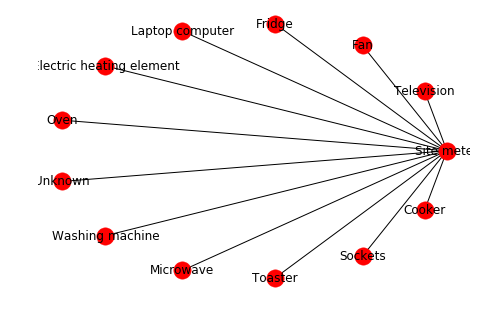

In [12]:
#plotting the wire diagram with availabe appliances
elec.draw_wiring_graph()

In [13]:
###INdividial Appliances proparties 

In [14]:
##taking the of fridge
fridge_meter = elec['fridge']



In [15]:
#Proparties of Fridge
fridge_meter.device

{'max_sample_period': 1,
 'model': 'GT',
 'measurements': [{'type': 'apparent', 'physical_quantity': 'power'}],
 'sample_period': 1}

In [16]:
#Loading the fridge data from h5 file
fridge_df = next(fridge_meter.load())

In [17]:
fridge_df.head() # Visualize the dataset

,power
,apparent
2015-07-05 00:00:08+02:00,99.210000
2015-07-05 00:00:09+02:00,99.179070
2015-07-05 00:00:10+02:00,99.148140
2015-07-05 00:00:11+02:00,99.117209
2015-07-05 00:00:12+02:00,99.086279


In [18]:
fridge_meter.total_energy() # kWh and type of data

apparent    5.41584
dtype: float64

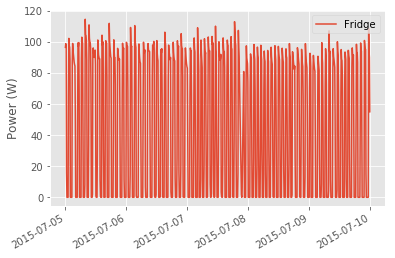

In [19]:
fridge_meter.plot() # plotting the fridge dataset for a 1 week

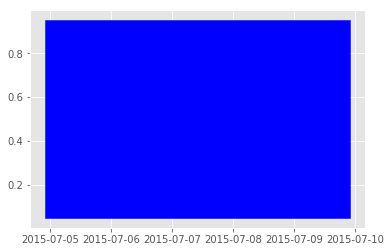

In [20]:
##Good sections : To check the data is recorderd proparyly or not. 
#when we plot the raw power data then we see there is one large gap where, supposedly, the metering system was not working.
# In our case, metering us working properly
good_sections = fridge_meter.good_sections(full_results=True)
good_sections.plot()

In [21]:
#selectin of data
good_sections.combined()

[TimeFrame(start='2015-07-05 00:00:08+02:00', end='2015-07-10 00:00:00+02:00', empty=False)]

In [22]:
#As well as large gaps appearing because the entire system is down, we also get frequent small gaps from wireless sensors dropping data. This is sometimes called 'dropout'. 
#The dropout rate is a number between 0 and 1 which specifies the proportion of missing samples.
#A dropout rate of 0 means no samples are missing. A value of 1 would mean all samples are missing
fridge_meter.dropout_rate()

0.0

In [23]:
##For television
television_meter = elec['television']

In [24]:
#Proparties of television
television_meter.device

{'max_sample_period': 1,
 'model': 'GT',
 'measurements': [{'type': 'apparent', 'physical_quantity': 'power'}],
 'sample_period': 1}

In [25]:
#visulize the data
television_df = next(television_meter.load())
television_df.head()

,power
,apparent
2015-07-05 00:00:10+02:00,0.0
2015-07-05 00:00:11+02:00,0.0
2015-07-05 00:00:12+02:00,0.0
2015-07-05 00:00:13+02:00,0.0
2015-07-05 00:00:14+02:00,0.0


In [26]:
television_meter.total_energy() # kWh

apparent    1.251359
dtype: float64

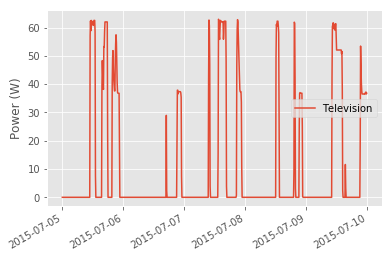

In [27]:
television_meter.plot() #plotting the television data

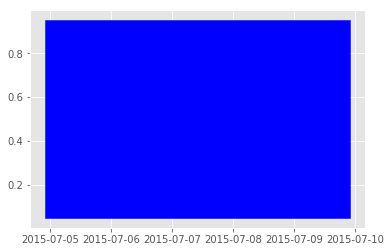

In [28]:
good_sections_t = television_meter.good_sections(full_results=True)
good_sections_t.plot()

In [29]:
good_sections_t.combined()

[TimeFrame(start='2015-07-05 00:00:10+02:00', end='2015-07-10 00:00:00+02:00', empty=False)]

In [30]:
television_meter.dropout_rate() #dropout rate

0.0

In [31]:
#Train the data using Combinatorial Optimisation 
co = ntk.disaggregate.CombinatorialOptimisation()
co.train(elec)

Training model for submeter 'ElecMeter(instance=2, building=1, dataset='DRED', appliances=[Appliance(type='television', instance=1)])'
Training model for submeter 'ElecMeter(instance=3, building=1, dataset='DRED', appliances=[Appliance(type='fan', instance=1)])'
Training model for submeter 'ElecMeter(instance=4, building=1, dataset='DRED', appliances=[Appliance(type='fridge', instance=1)])'
Training model for submeter 'ElecMeter(instance=5, building=1, dataset='DRED', appliances=[Appliance(type='laptop computer', instance=1)])'
Training model for submeter 'ElecMeter(instance=6, building=1, dataset='DRED', appliances=[Appliance(type='electric heating element', instance=1)])'
Training model for submeter 'ElecMeter(instance=7, building=1, dataset='DRED', appliances=[Appliance(type='oven', instance=1)])'
Training model for submeter 'ElecMeter(instance=8, building=1, dataset='DRED', appliances=[Appliance(type='unknown', instance=1)])'
Training model for submeter 'ElecMeter(instance=9, build

In [32]:
##Disaggreagtion via CO
disag_filename = join(h5_path, 'Weekly_COMBINATORIAL_OPTIMIZATION.h5')

mains = elec.mains()

try:
    output = ntk.HDFDataStore(disag_filename, 'w')
    co.disaggregate(mains, output)
except ValueError:
    output.close()
    output = ntk.HDFDataStore(disag_filename, 'w')
    co.disaggregate(mains, output)

for meter in range(1, 2):
    df1 = output.store.get('/building1/elec/meter{}'.format(meter))
    df2 = dred.store.store.get('/building1/elec/meter{}'.format(meter))

    
output.close()

Estimating power demand for 'ElecMeter(instance=2, building=1, dataset='DRED', appliances=[Appliance(type='television', instance=1)])'
Estimating power demand for 'ElecMeter(instance=3, building=1, dataset='DRED', appliances=[Appliance(type='fan', instance=1)])'
Estimating power demand for 'ElecMeter(instance=4, building=1, dataset='DRED', appliances=[Appliance(type='fridge', instance=1)])'
Estimating power demand for 'ElecMeter(instance=5, building=1, dataset='DRED', appliances=[Appliance(type='laptop computer', instance=1)])'
Estimating power demand for 'ElecMeter(instance=6, building=1, dataset='DRED', appliances=[Appliance(type='electric heating element', instance=1)])'
Estimating power demand for 'ElecMeter(instance=7, building=1, dataset='DRED', appliances=[Appliance(type='oven', instance=1)])'
Estimating power demand for 'ElecMeter(instance=8, building=1, dataset='DRED', appliances=[Appliance(type='unknown', instance=1)])'
Estimating power demand for 'ElecMeter(instance=9, build

In [33]:
#Disaggregate via CO
#output = ntk.HDFDataStore(h5_path + 'Weekly_COMBINATORIAL_OPTIMIZATION.h5', 'w')
#co.disaggregate(mains, output)
#output.close()

In [34]:
#Metrics==========================================================================
disag = ntk.DataSet(h5_path + 'Weekly_outputDRED.h5')
disag_elec = disag.buildings[1].elec
disag_elec

MeterGroup(meters=
  ElecMeter(instance=1, building=1, dataset='CO', site_meter, appliances=[])
  ElecMeter(instance=2, building=1, dataset='CO', appliances=[Appliance(type='television', instance=1)])
  ElecMeter(instance=3, building=1, dataset='CO', appliances=[Appliance(type='fan', instance=1)])
  ElecMeter(instance=4, building=1, dataset='CO', appliances=[Appliance(type='fridge', instance=1)])
  ElecMeter(instance=5, building=1, dataset='CO', appliances=[Appliance(type='laptop computer', instance=1)])
  ElecMeter(instance=6, building=1, dataset='CO', appliances=[Appliance(type='electric heating element', instance=1)])
  ElecMeter(instance=7, building=1, dataset='CO', appliances=[Appliance(type='oven', instance=1)])
  ElecMeter(instance=8, building=1, dataset='CO', appliances=[Appliance(type='unknown', instance=1)])
  ElecMeter(instance=9, building=1, dataset='CO', appliances=[Appliance(type='washing machine', instance=1)])
  ElecMeter(instance=10, building=1, dataset='CO', appliance

C:\Users\Dhruvin suthar\Anaconda3\envs\nilmtk-env\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


2     0.213910
3     0.237900
4     0.564750
5     0.477773
6     0.047019
7     0.122449
8     0.000000
9     0.000000
10    0.082645
11    0.031250
12    0.164589
13    0.215054
dtype: float64


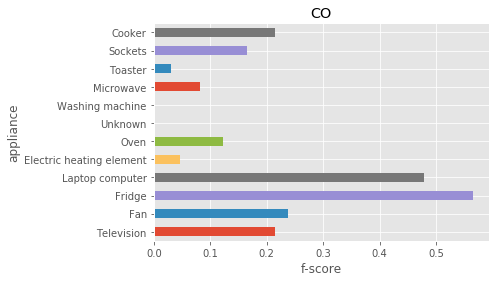

In [35]:
#Accuracy with F1-score of COMBINATORIAL_OPTIMIZATIONw
f1 = ntk.metrics.f1_score(disag_elec, elec)
print(f1)
f1.index = disag_elec.get_labels(f1.index)
f1.plot(kind='barh')
plt.ylabel('appliance');
plt.xlabel('f-score');
plt.title("CO");

In [36]:
#Train the data using Factorial Hidden Markov Model(FHMM)
fhmm = ntkd.fhmm_exact.FHMM()
fhmm.train(elec)

Training model for submeter 'ElecMeter(instance=2, building=1, dataset='DRED', appliances=[Appliance(type='television', instance=1)])'
Training model for submeter 'ElecMeter(instance=3, building=1, dataset='DRED', appliances=[Appliance(type='fan', instance=1)])'
Training model for submeter 'ElecMeter(instance=4, building=1, dataset='DRED', appliances=[Appliance(type='fridge', instance=1)])'
Training model for submeter 'ElecMeter(instance=5, building=1, dataset='DRED', appliances=[Appliance(type='laptop computer', instance=1)])'
Training model for submeter 'ElecMeter(instance=6, building=1, dataset='DRED', appliances=[Appliance(type='electric heating element', instance=1)])'
Training model for submeter 'ElecMeter(instance=7, building=1, dataset='DRED', appliances=[Appliance(type='oven', instance=1)])'
Training model for submeter 'ElecMeter(instance=8, building=1, dataset='DRED', appliances=[Appliance(type='unknown', instance=1)])'
Training model for submeter 'ElecMeter(instance=9, build

In [37]:
# name of file to save disaggregated output to
disag_filename_1 = 'outputDRED_FHMM.h5'
output_f = ntk.HDFDataStore(disag_filename_1, 'w')

output_f.close
#Disaggregate via CO
#output = ntk.HDFDataStore(h5_path + 'Weekly_COMBINATORIAL_OPTIMIZATION.h5', 'w')
#co.disaggregate(mains, output)
#output.close()

<function nilmtk.datastore.hdfdatastore.DocInherit.get_with_inst.<locals>.f(self)>

In [38]:
##Disaggregation with factorial hidden markov model
fhmm.disaggregate(mains, output_f)
output_f.close()

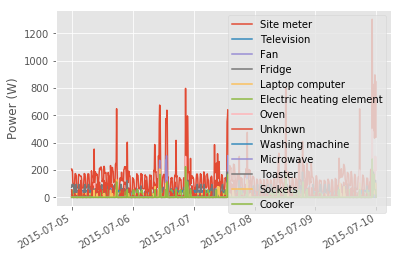

In [39]:
#creating the Metrics
disag_fhmm= ntk.DataSet(disag_filename)
disag_fhmm_elec= disag_fhmm.buildings[1].elec
disag_fhmm_elec.plot()

In [40]:
#compute assigned_energy of appliances 
from nilmtk.metrics import  error_in_assigned_energy
error =error_in_assigned_energy(disag_fhmm_elec, elec)
error

2     apparent    1.557158
dtype: float64
3      apparent    1.08258
dtype: float64
4     apparent    2.284074
dtype: float64
5     apparent    0.261526
dtype: float64
6     apparent    1.417993
dtype: float64
7     apparent    0.287417
dtype: float64
8     apparent    2.534008
dtype: float64
9     apparent    0.081595
dtype: float64
10     apparent    0.10013
dtype: float64
11    apparent    0.525036
dtype: float64
12    apparent    0.501027
dtype: float64
13    apparent    0.534949
dtype: float64
dtype: object

2     0.213910
3     0.237900
4     0.564750
5     0.477773
6     0.047019
7     0.122449
8     0.000000
9     0.000000
10    0.082645
11    0.031250
12    0.164589
13    0.215054
dtype: float64


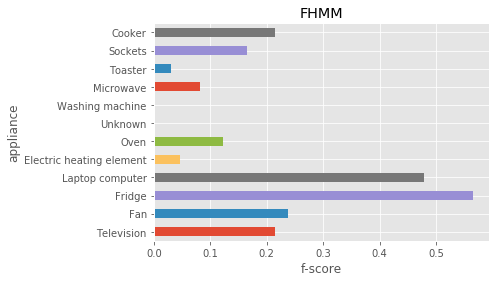

In [41]:
# make plots of f1 score for fhmm
from nilmtk.metrics import f1_score 
f1_fhmm = f1_score(disag_fhmm_elec, elec)
print(f1_fhmm)
f1_fhmm.index = disag_fhmm_elec.get_labels(f1_fhmm.index)
f1_fhmm.plot(kind='barh')
plt.ylabel('appliance');
plt.xlabel('f-score');
plt.title("FHMM");

In [42]:
# comperision of CO and FHMM 

In [43]:
def predict(clf, test_elec, sample_period, timezone):
    pred = {}
    gt= {}

    for i, chunk in enumerate(test_elec.mains().load(sample_period=sample_period)):
        chunk_drop_na = chunk.dropna()
        pred[i] = clf.disaggregate_chunk(chunk_drop_na)
        gt[i]={}

        for meter in test_elec.submeters().meters:
            # Only use the meters that we trained on (this saves time!)    
            gt[i][meter] = next(meter.load(sample_period=sample_period))
        gt[i] = pd.DataFrame({k:v.squeeze() for k,v in iteritems(gt[i]) if len(v)}, index=next(iter(gt[i].values())).index).dropna()
        
    # If everything can fit in memory
    gt_overall = pd.concat(gt)
    gt_overall.index = gt_overall.index.droplevel()
    pred_overall = pd.concat(pred)
    pred_overall.index = pred_overall.index.droplevel()

    # Having the same order of columns
    gt_overall = gt_overall[pred_overall.columns]
    
    #Intersection of index
    gt_index_utc = gt_overall.index.tz_convert("UTC")
    pred_index_utc = pred_overall.index.tz_convert("UTC")
    common_index_utc = gt_index_utc.intersection(pred_index_utc)
    
    
    common_index_local = common_index_utc.tz_convert(timezone)
    gt_overall = gt_overall.ix[common_index_local]
    pred_overall = pred_overall.ix[common_index_local]
    appliance_labels = [m for m in gt_overall.columns.values]
    gt_overall.columns = appliance_labels
    pred_overall.columns = appliance_labels
    return gt_overall, pred_overall


In [44]:
from nilmtk import DataSet, TimeFrame, MeterGroup, HDFDataStore
from nilmtk.disaggregate import CombinatorialOptimisation, FHMM
import pandas as pd
from six import iteritems
classifiers = {'CO':CombinatorialOptimisation(), 'FHMM':FHMM()}
predictions = {}
sample_period = 120
for clf_name, clf in classifiers.items():
    print("*"*20)
    print(clf_name)
    print("*" *20)
    clf.train(elec, sample_period=sample_period)
    gt, predictions[clf_name] = predict(clf, elec, 120, dred.metadata['timezone'])

********************
CO
********************
Training model for submeter 'ElecMeter(instance=2, building=1, dataset='DRED', appliances=[Appliance(type='television', instance=1)])'
Training model for submeter 'ElecMeter(instance=3, building=1, dataset='DRED', appliances=[Appliance(type='fan', instance=1)])'
Training model for submeter 'ElecMeter(instance=4, building=1, dataset='DRED', appliances=[Appliance(type='fridge', instance=1)])'
Training model for submeter 'ElecMeter(instance=5, building=1, dataset='DRED', appliances=[Appliance(type='laptop computer', instance=1)])'
Training model for submeter 'ElecMeter(instance=6, building=1, dataset='DRED', appliances=[Appliance(type='electric heating element', instance=1)])'
Training model for submeter 'ElecMeter(instance=7, building=1, dataset='DRED', appliances=[Appliance(type='oven', instance=1)])'
Training model for submeter 'ElecMeter(instance=8, building=1, dataset='DRED', appliances=[Appliance(type='unknown', instance=1)])'
Training mo

In [45]:
def compute_rmse(gt, pred):
    from sklearn.metrics import mean_squared_error
    rms_error = {}
    for appliance in gt.columns:
        rms_error[appliance] = np.sqrt(mean_squared_error(gt[appliance], pred[appliance]))
    return pd.Series(rms_error)

In [46]:
##the mean squared error (MSE) or mean squared deviation (MSD) of an estimator (of a procedure for estimating an unobserved quantity) measures 
#the average of the squares of the errors—that is, the average squared difference between the estimated values 
import numpy as np
rmse = {}
for clf_name in classifiers.keys():
    rmse[clf_name] = compute_rmse(gt, predictions[clf_name])
rmse = pd.DataFrame(rmse)

In [47]:
rmse

,CO,FHMM
"ElecMeter(instance=2, building=1, dataset='DRED', appliances=[Appliance(type='television', instance=1)])",34.701957,26.827903
"ElecMeter(instance=3, building=1, dataset='DRED', appliances=[Appliance(type='fan', instance=1)])",19.736518,20.009338
"ElecMeter(instance=4, building=1, dataset='DRED', appliances=[Appliance(type='fridge', instance=1)])",42.234955,31.054459
"ElecMeter(instance=5, building=1, dataset='DRED', appliances=[Appliance(type='laptop computer', instance=1)])",16.902096,18.005224
"ElecMeter(instance=6, building=1, dataset='DRED', appliances=[Appliance(type='electric heating element', instance=1)])",21.836486,12.694029
"ElecMeter(instance=7, building=1, dataset='DRED', appliances=[Appliance(type='oven', instance=1)])",44.623254,44.580188
"ElecMeter(instance=8, building=1, dataset='DRED', appliances=[Appliance(type='unknown', instance=1)])",2.553917,2.553917
"ElecMeter(instance=9, building=1, dataset='DRED', appliances=[Appliance(type='washing machine', instance=1)])",0.680000,0.320000
"ElecMeter(instance=10, building=1, dataset='DRED', appliances=[Appliance(type='microwave', instance=1)])",56.770583,65.476157
"ElecMeter(instance=11, building=1, dataset='DRED', appliances=[Appliance(type='toaster', instance=1)])",12.100002,12.100002
